<center><h1>Online Shoppers Intention Prediction</h1></center> 

### Data Source: 
http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

### Activity Goal
The main objective is to design a machine learning classification system, that is able to predict an online shopper's intention ( _buy_ or _no_ _buy_ ), based on the values of the given features. 

Here we go for different classification algorithms, and compare their performance, in order to pick the best one.


### Data Description: 

#### Numerical features

The dataset consists of feature vectors belonging to 12,330 sessions. 

| Feature name | Feature description                                                 | Min. val | Max. val | SD     |
|:-------------|:--------------------------------------------------------------------|:---------|:---------|:-------|
| Admin.       | #pages visited by the visitor about account management              | 0        | 27       | 3.32   |
| Ad. duration | #seconds spent by the visitor on account management related pages	 | 0        | 3398     | 176.70 |
| Info.        | #informational pages visited by the visitor                         | 0        | 24       | 1.26   |
| Info. durat. | #seconds spent by the visitor on informational pages	             | 0        | 2549     | 140.64 |
| Prod.        | #pages visited by visitor about product related pages	             | 0        | 705      | 44.45  |
| Prod.durat.  | #seconds spent by the visitor on product related pages	             | 0        | 63,973   | 1912.3 |
| Bounce rate  | Average bounce rate value of the pages visited by the visitor	     | 0        | 0.2      | 0.04   |
| Exit rate	   | Average exit rate value of the pages visited by the visitor         | 0        | 0.2      | 0.05   |
| Page value   | Average page value of the pages visited by the visitor	             | 0        | 361      | 18.55  |
| Special day  | Closeness of the site visiting time to a special day	             | 0        | 1.0      | 0.19   |

#### Categorical features
| Feature name        | Feature description                                                      | Number of Values |
|:--------------------|:-------------------------------------------------------------------------|:-----------------|
| OperatingSystems    | Operating system of the visitor                                          | 8                |
| Browser             | Browser of the visitor                                                   | 13               |
| Region              | Geographic region from which the session has been started by the visitor | 9                |
| TrafficType         | Traffic source (e.g., banner, SMS, direct)                               | 20               |
| VisitorType         | Visitor type as “New Visitor,” “Returning Visitor,” and “Other”	         | 3                |
| Weekend             | Boolean value indicating whether the date of the visit is weekend        | 2                |
| Month               | Month value of the visit date                                            | 12               |
| Revenue             | Class label: whether the visit has been finalized with a transaction     | 2                |

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.metrics import confusion_matrix,accuracy_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Importing Dataset

In [3]:
df=pd.read_csv("online_shoppers_intention.csv")

In [4]:
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#datatypes description of each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Statistical Report

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Dataset have no missing values**

In [8]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## 2. Data Pre-Processing

### Outlier Detection and Handling

In [10]:
df.shape

(12330, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

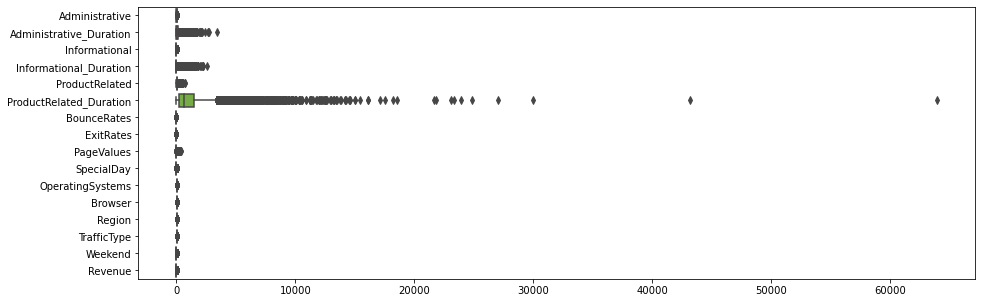

In [11]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.show

In [12]:
outliers=['Administrative_Duration','ProductRelated_Duration','PageValues','TrafficType','Informational_Duration','OperatingSystems','Informational']
ind1,ind2,i1,i2=[],[],[],[]


for i in outliers:
    print('Outliers detection and handling in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(df[i],25,interpolation='midpoint')
    Q2=np.percentile(df[i],50,interpolation='midpoint')
    Q3=np.percentile(df[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in df[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=df[i] > up_lim, df[i]
    i1=df.loc[ind1].index

    df.drop(i1,inplace=True)
    
    print('size after removal of outliers in',i.upper(),'column:',df.shape,'\n')

Outliers detection and handling in ADMINISTRATIVE_DURATION COLUMN: 

The values below -139.81875000000002 and above 233.03125000000003 are outliers.
There are 1173 outliers in Administrative_Duration column.
size after removal of outliers in ADMINISTRATIVE_DURATION column: (11157, 18) 

Outliers detection and handling in PRODUCTRELATED_DURATION COLUMN: 

The values below -1550.6999999999998 and above 3012.5 are outliers.
There are 851 outliers in ProductRelated_Duration column.
size after removal of outliers in PRODUCTRELATED_DURATION column: (10306, 18) 

Outliers detection and handling in PAGEVALUES COLUMN: 

The values below 0.0 and above 0.0 are outliers.
There are 1798 outliers in PageValues column.
size after removal of outliers in PAGEVALUES column: (8508, 18) 

Outliers detection and handling in TRAFFICTYPE COLUMN: 

The values below -1.0 and above 7.0 are outliers.
There are 1509 outliers in TrafficType column.
size after removal of outliers in TRAFFICTYPE column: (6999, 18) 


In [13]:
df.shape

(4640, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

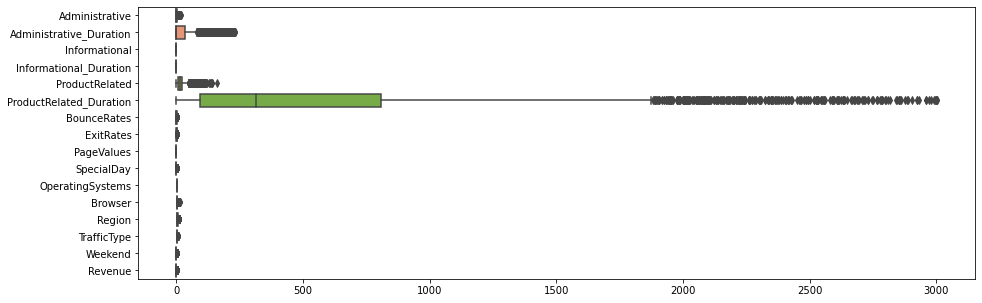

In [14]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.show

In [15]:
df.shape

(4640, 18)

### Feature Reduction

In [16]:
df.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [17]:
#Dropping columns
df.drop(labels=['Region','TrafficType','SpecialDay'],axis=1,inplace=True)
df.shape

(4640, 15)

In [18]:
nonum_feats_names = ['Month','OperatingSystems','Browser','VisitorType','Weekend']


df1 = pd.concat([df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']],
                       pd.get_dummies(df[nonum_feats_names].astype('category')),df['Revenue']],axis=1)
                      
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month_Aug,...,Browser_7,Browser_8,Browser_10,Browser_12,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_0,Weekend_1,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0,...,0,0,0,0,0,0,1,1,0,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0,...,0,0,0,0,0,0,1,1,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0,...,0,0,0,0,0,0,1,1,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0,...,0,0,0,0,0,0,1,0,1,0


#### Data Split

In [19]:
# Extract feature columns
feature_cols = list(df.columns[:-1])
print("Feature columns:\n\n",feature_cols)

Feature columns:

 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems', 'Browser', 'VisitorType', 'Weekend']


In [20]:
# Extract target column
target_col = df.columns[-1]
print("\nTarget column: ",target_col)


Target column:  Revenue


In [21]:
y = df1['Revenue']
X = df1.drop(['Revenue'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [23]:
print("Training set has ",X_train.shape[0], " samples.")
print("Testing set has ",X_test.shape[0], " samples.")

Training set has  2784  samples.
Testing set has  1856  samples.


#### Label Encoding

In [24]:
#Label Encoding of revenue



from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

df['Revenue'].head()

# getting dependent and independent variables

x = df1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = df['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4640, 35)
Shape of y: (4640,)


#### Data Scaling

We will scale the features in our subsets, in order to use them to train, validate, and test models that will benefit from feature scaling.  

In [25]:
scaler = StandardScaler()

scaler_train = scaler.fit_transform(X_train)

scaler_test = scaler.fit_transform(X_test)


## 3. Exploratory Data Analysis (EDA)

### **Uni-Variate Analysis of the Data**

Text(0, 0.5, 'count')

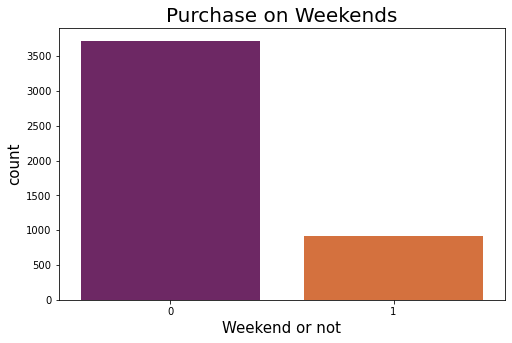

In [26]:
# checking the Distribution of customers on Weekend
plt.subplots(figsize=(8,5))
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


##### Page Metrics Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

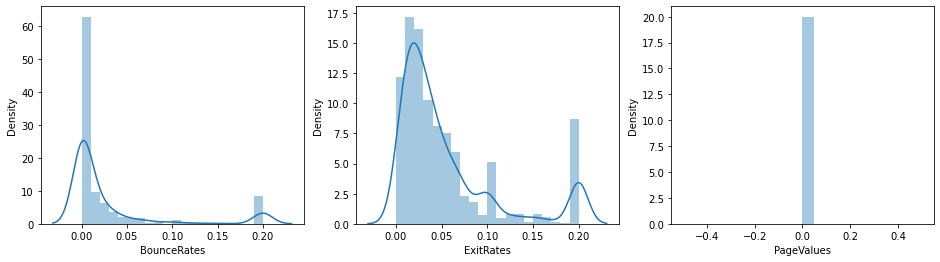

In [27]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)


plt.show

From the above visualizations of  analytics metrics, we can conclude: 
- *BounceRates* & *PageValues* do not follow a normal distribution. 
- All 3 features have distributions that are skewed right. 
- All 3 distributions have a lot of outliers

In [28]:
#Visitor Type Count
df['VisitorType'].value_counts()

Returning_Visitor    3950
New_Visitor           674
Other                  16
Name: VisitorType, dtype: int64

In [29]:
# checking the no. of OSes each user is having

df['OperatingSystems'].value_counts()

2    3218
1    1422
Name: OperatingSystems, dtype: int64

#### Visit Date Analysis

In [30]:
#checking the months with most no.of customers visiting the online shopping sites

df['Month'].value_counts()

May     1407
Mar      857
Nov      854
Dec      614
Oct      181
Aug      160
Sep      159
Jul      155
Feb      132
June     121
Name: Month, dtype: int64

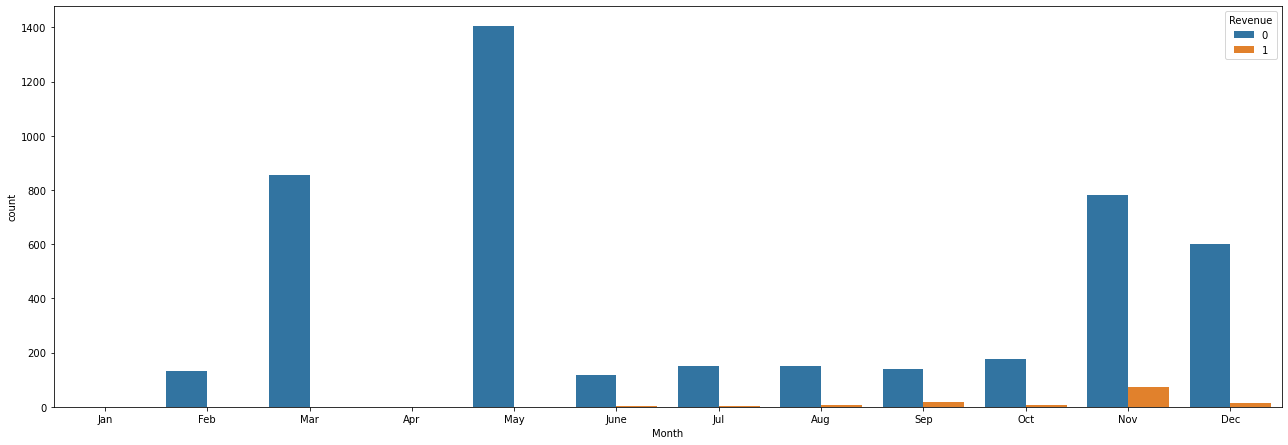

In [31]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)


plt.tight_layout()
plt.show()

- On March and May, we have a lot of visits (May is the month with the highest number of visits) 
- We have no visits at all during Jan nor Apr.
- Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions

### **Bi-Variate Analysis**

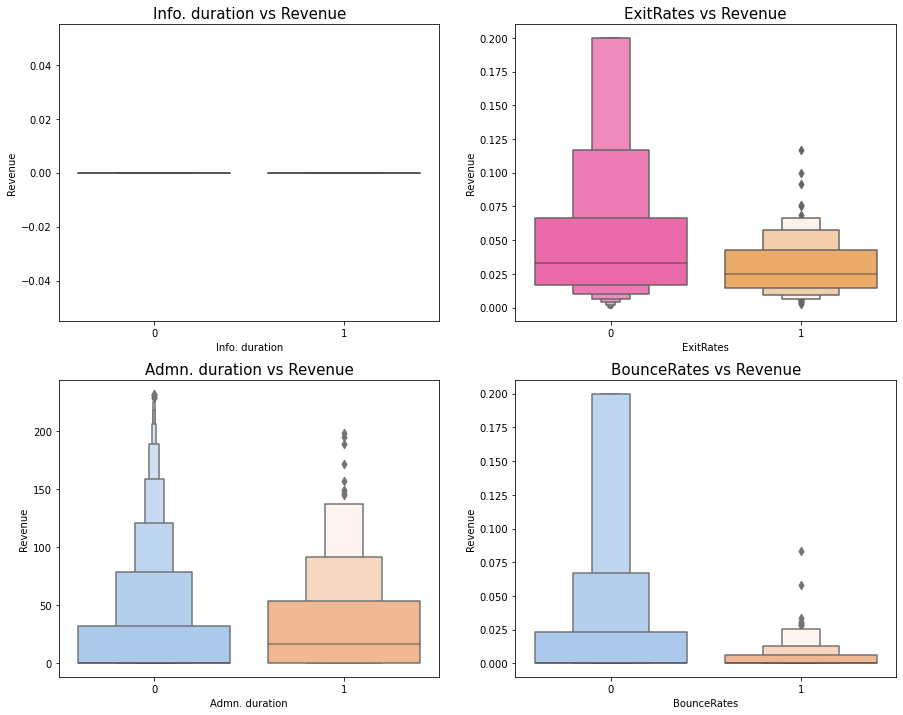

In [32]:


plt.rcParams['figure.figsize'] = (15, 12)

plt.subplot(2, 2, 1)
sns.boxplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 15)
plt.xlabel('Info. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize =15)
plt.xlabel('ExitRates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)


plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 15)
plt.xlabel('Admn. duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['BounceRates'], palette = 'pastel')
plt.title('BounceRates vs Revenue', fontsize = 15)
plt.xlabel('BounceRates', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)




plt.show()

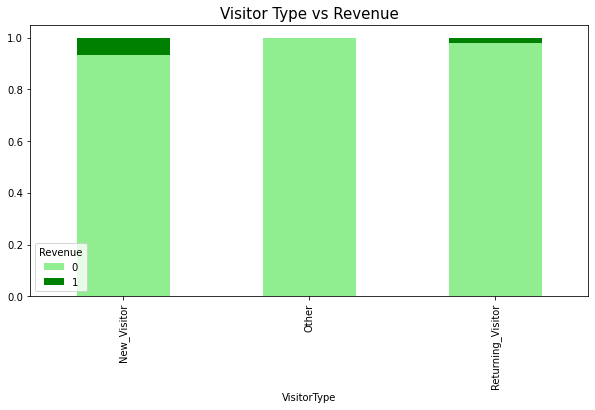

In [33]:
# visitor type vs revenue

df_revenue = pd.crosstab(df['VisitorType'], df['Revenue'])
df_revenue.div(df_revenue.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 15)
plt.show()

In [34]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month', 'OperatingSystems',
       'Browser', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

## 4. Modelling

In [36]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),  
            RandomForestClassifier(), SVC(),GradientBoostingClassifier()]


recall = []
accuracy = []
f1=[]
precision=[]


for classifier in models:
    pred = cross_val_score(classifier, X_train, y_train, scoring='recall', cv=7).mean()
    recall.append(pred)

    pred = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=7).mean()
    accuracy.append(pred)
    
    pred = cross_val_score(classifier, X_train, y_train, scoring='precision', cv=7).mean()
    precision.append(pred)
    
    pred = cross_val_score(classifier, X_train, y_train, scoring='f1', cv=7).mean()
    f1.append(pred)
    

In [37]:
class_model = ['DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression', 'SVC',
         'RandomForestClassifier','GradientBoosting']

result = pd.DataFrame({'Model': class_model, 'Accuracy': accuracy, 'Recall': recall, 'Precision':precision, 'F1score':f1})
result

,Model,Accuracy,Recall,Precision,F1score
0,DecisionTreeClassifier,0.949352,0.188312,0.129388,0.157920
1,KNeighborsClassifier,0.970546,0.012987,0.071429,0.021978
2,LogisticRegression,0.971265,0.000000,0.000000,0.000000
3,SVC,0.970545,0.000000,0.000000,0.000000
4,RandomForestClassifier,0.971265,0.000000,0.000000,0.000000
5,GradientBoosting,0.969109,0.024892,0.095238,0.039456


## 5. Model Tuning

- **SVC and Randomforest have high accuracy**
- **So we can tune both using hyper parameters**

#### 1.Decision Tree Classifier

In [53]:
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10), 
    "min_samples_leaf": [1,2,5,10],
             }]

dt = GridSearchCV(DecisionTreeClassifier(),
                  parameters, 
                  cv=5, n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

dt.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_leaf': [1, 2, 5, 10],
                          'min_samples_split': range(1, 10)}],
             scoring='f1', verbose=True)

In [54]:
print(dt.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [55]:
# Decision Tree with best parameters
gs_dt = DecisionTreeClassifier(criterion='gini', 
                               max_depth= 6, 
                               min_samples_leaf=1, 
                               min_samples_split=2,)
gs_dt.fit(X_train, y_train)
gs_dt.score(X_test,y_test)

0.9676724137931034

#### 2.Random Forest Classifier

In [71]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())
rft=RandomForestClassifier(n_estimators=500,max_depth=1000,random_state=42,criterion='gini')
rft.fit(X_train,y_train)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


RandomForestClassifier(max_depth=1000, n_estimators=500, random_state=42)

In [73]:
pred=rft.predict(X_test)
accuracy_score(y_test,pred)
print('Accuracy score is:', accuracy_score(y_test,pred))
print('F1 score is:', f1_score(y_test,pred))

Accuracy score is: 0.9757543103448276
F1 score is: 0.042553191489361694


#### 3.SVC Tuning

In [68]:

svc = SVC(C=0.1 , gamma = 1 , kernel = 'rbf')
print(svc.get_params())
svc.fit(X_train,y_train)

{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(C=0.1, gamma=1)

In [70]:
pred=svc.predict(X_test)
print('Accuracy score is:', accuracy_score(y_test,pred))
print('F1 score is:', f1_score(y_test,pred))


Accuracy score is: 0.9752155172413793
F1 score is: 0.0


## **Inference**

- **It is evident from the Hyper Parameter Tuning that there is increase in the performance.**
- **The change is high in the case of Decision Tree method.**
- **We can understand from the analysis that Random Forest classifier has highest accuracy score with a score of 97.58 and a F1 score of 0.043.**

## Reference

Research paper on which this study is based on https://link.springer.com/article/10.1007%2Fs00521-018-3523-0

Dataset is downloaded from http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset